In [393]:
###################### Machine Learning Project ######################

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm




In [4]:
# reading traint dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# removing the 'Id' column
df = df.drop('Id',1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


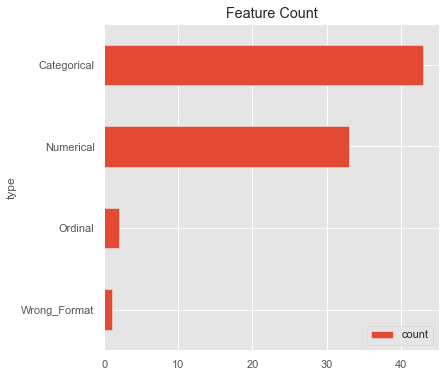

In [497]:
# ploting the count of each type of features
count_ = [['Numerical',33],['Categorical', 43], ['Ordinal',2],['Wrong_Format',1]]
feature_count = pd.DataFrame(count_,columns=['type','count'])
feature_count = feature_count.set_index('type')
matplotlib.rcParams['figure.figsize'] = (6, 6)
feature_count.sort_values('count', ascending=True).plot(kind = 'barh', title = 'Feature Count')

RoofMatl           0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


Text(0, 0.5, 'Features')

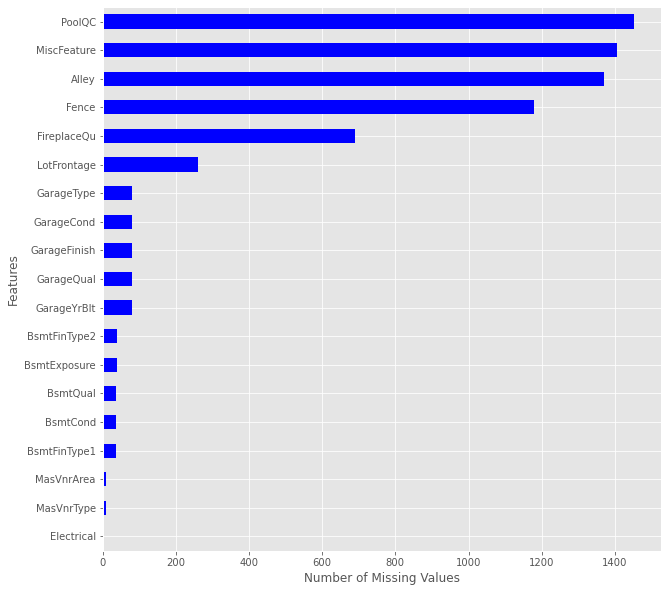

In [6]:
# Null values 

print(np.sum(df.isna()).sort_values().tail(20))
plt.figure(figsize=(10,10))
np.sum(df.isna()).sort_values().tail(19).plot(kind = 'barh', color = 'blue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')

In [9]:
df2 = df.copy()
target = pd.Series(df2.SalePrice , name='SalePrice')
df2 = df2.drop('SalePrice',1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.3, random_state=42)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
1452,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
762,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal
932,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
435,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal


In [10]:
# imputation

# for these features, it's highly possible that missing value caused by nonexistance of the the specific feature

X_train['PoolQC'] = X_train['PoolQC'].replace(np.nan,'NA')
X_train['MiscFeature'] = X_train['MiscFeature'].replace(np.nan,'NA')
X_train['Alley'] = X_train['Alley'].replace(np.nan,'NA')
X_train['Fence'] = X_train['Fence'].replace(np.nan,'NA')
X_train['FireplaceQu'] = X_train['FireplaceQu'].replace(np.nan,'NA')
X_train['GarageType'] = X_train['GarageType'].replace(np.nan,'NA')
X_train['GarageCond'] = X_train['GarageCond'].replace(np.nan,'NA')
X_train['GarageFinish'] = X_train['GarageFinish'].replace(np.nan,'NA')
X_train['GarageQual'] = X_train['GarageQual'].replace(np.nan,'NA')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].replace(np.nan,'NA')
X_train['BsmtExposure'] = X_train['BsmtExposure'].replace(np.nan,'NA')
X_train['BsmtQual'] = X_train['BsmtQual'].replace(np.nan,'NA')
X_train['BsmtCond'] = X_train['BsmtCond'].replace(np.nan,'NA')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].replace(np.nan,'NA')
X_train['MasVnrType'] = X_train['MasVnrType'].replace(np.nan, None) #*****
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.nan, X_train.MasVnrArea.mean()) #*****
# we use mode for type of electrical
X_train['Electrical'] = X_train['Electrical'].replace(np.nan,X_train.Electrical.mode())

# We first groupby neighborhood and then use the median in each neighborhood
X_train['LotFrontage'] = X_train.replace(np.nan,X_train.groupby('Neighborhood').LotFrontage.mean()) #*****

# be extra careful with garage year build
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.nan, None) #******
 

<ipython-input-10-cf609c8a3e33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PoolQC'] = X_train['PoolQC'].replace(np.nan,'NA')
<ipython-input-10-cf609c8a3e33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['MiscFeature'] = X_train['MiscFeature'].replace(np.nan,'NA')
<ipython-input-10-cf609c8a3e33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [11]:
# We need to change this feature to categorical because numeric codes don't represent any meaningful number
X_train['MSSubClass'] = X_train.MSSubClass.apply(lambda x: str(x))

<ipython-input-11-b1ff4c3519b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['MSSubClass'] = X_train.MSSubClass.apply(lambda x: str(x))


In [12]:
X_train['LotFrontage'] = X_train.LotFrontage.apply(lambda x: int(x))

<ipython-input-12-9b541c8bf5d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['LotFrontage'] = X_train.LotFrontage.apply(lambda x: int(x))


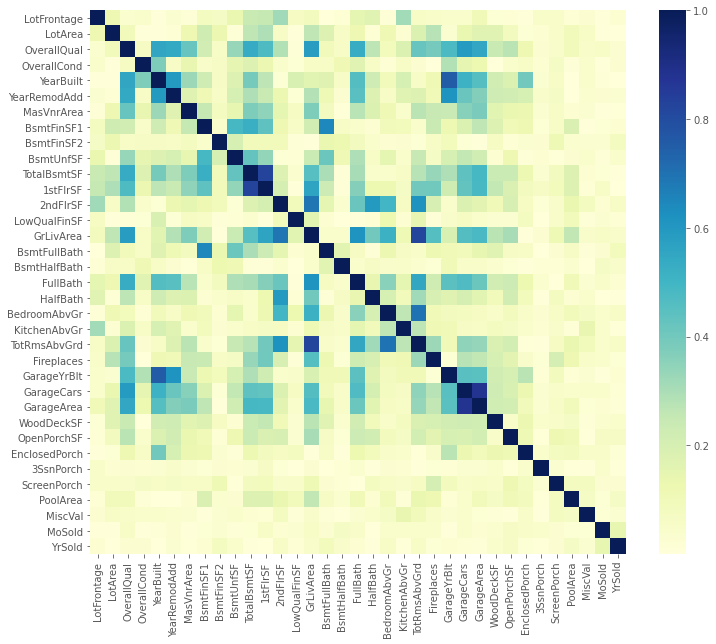

In [13]:
plt.figure(figsize=(12,10))
cor = X_train.corr().apply(lambda x:np.abs(x))
sns.heatmap(cor, annot=False, cmap ="YlGnBu")

Text(0.5, 0, 'Correlation Coefficient')

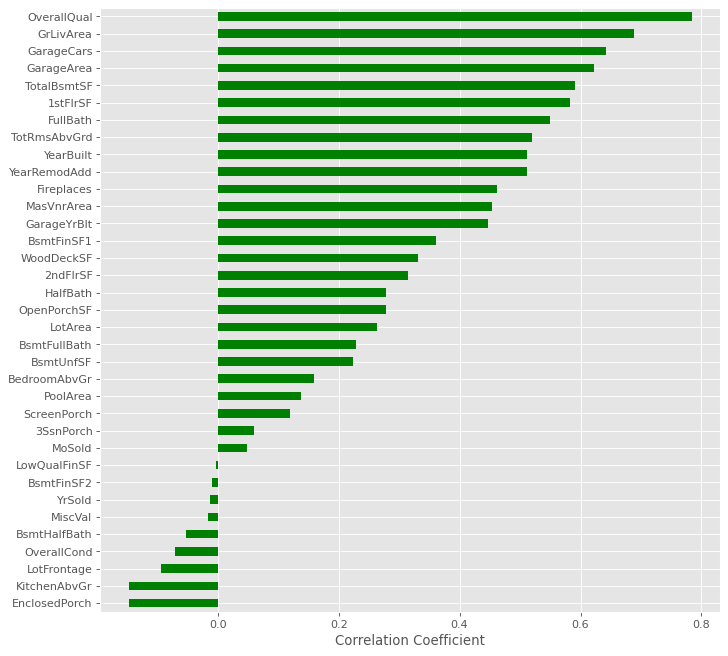

In [25]:
numerical_mask = X_train.dtypes!=object
numerical_features = X_train.columns[numerical_mask]
corr_w_target = pd.DataFrame(X_train[numerical_features].apply(lambda x: (x.corr(y_train))))
corr_w_target.columns = ['Correlation']
# corr_w_target
plt.figure(figsize = (10,10),dpi=80)
corr_w_target.Correlation.sort_values().plot(kind = 'barh',color = 'green')
plt.xlabel('Correlation Coefficient')

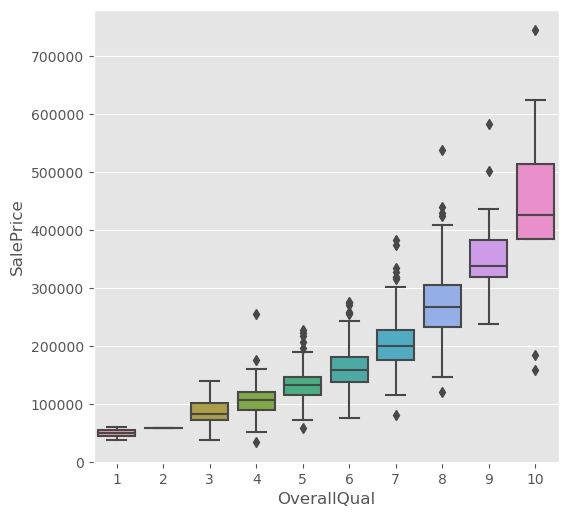

In [26]:
# Some EDA
plt.figure(figsize=(6,6),dpi=100)
#sns.boxplot(x ='OverallQual',y ='SalePrice',data = df)
sns.boxplot(x =X_train['OverallQual'],y = y_train)

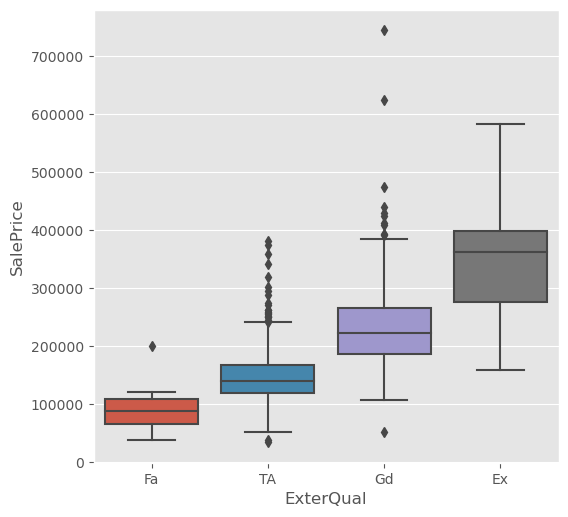

In [28]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['ExterQual'],y =y_train, order=['Fa','TA','Gd','Ex'])

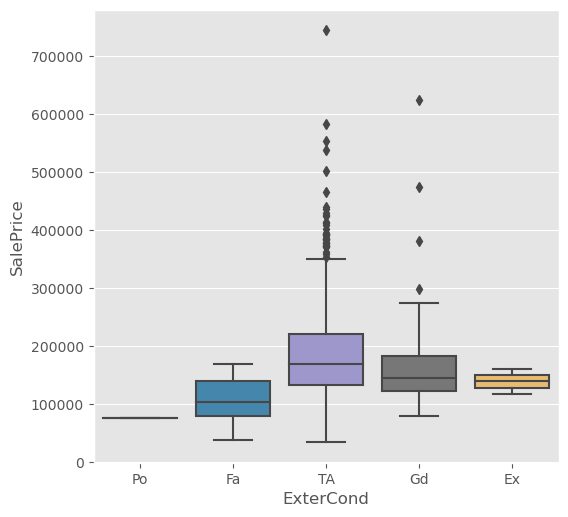

In [29]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['ExterCond'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

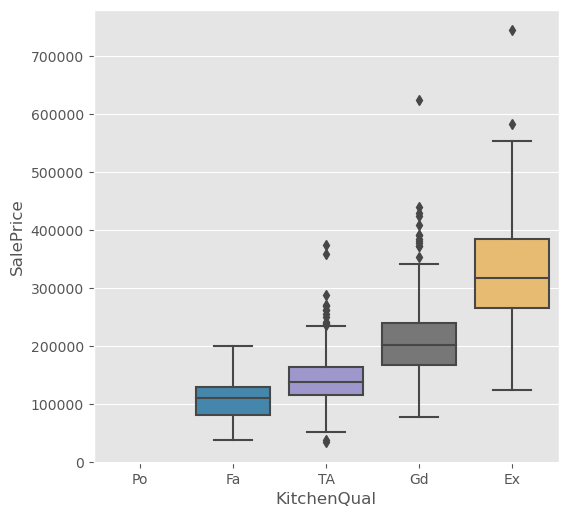

In [30]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['KitchenQual'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

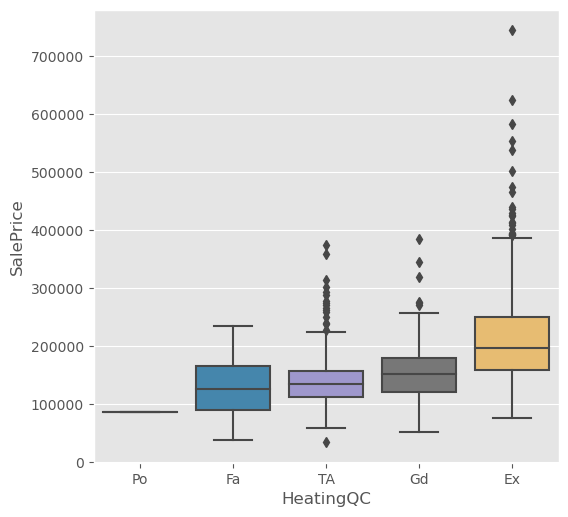

In [31]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['HeatingQC'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

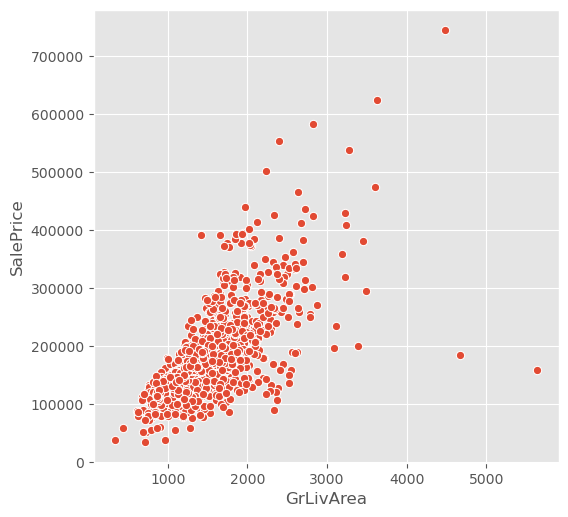

In [32]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(x =X_train['GrLivArea'],y =y_train)

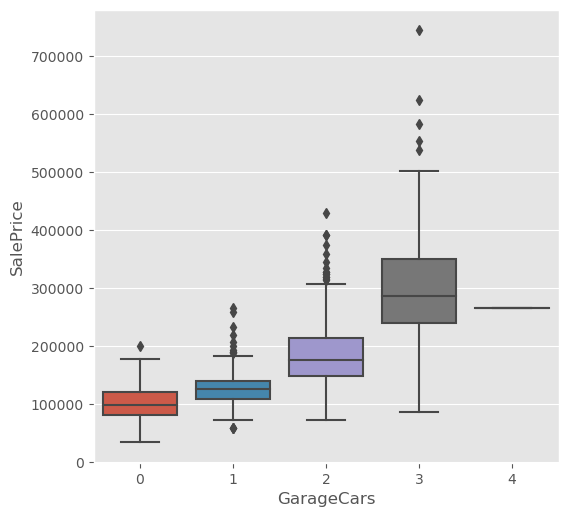

In [33]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['GarageCars'],y =y_train)

In [34]:
# we only have 5 observations with 1 Garages
X_train[X_train['GarageCars']==4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
747,70,RM,70,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,5,2009,WD,Normal


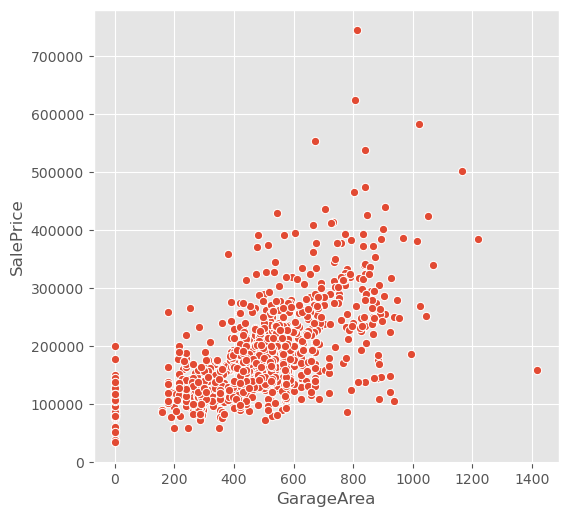

In [36]:
plt.figure(figsize = (6,6),dpi = 100)
sns.scatterplot(x =X_train['GarageArea'],y =y_train)

Text(0, 0.5, 'Frequency')

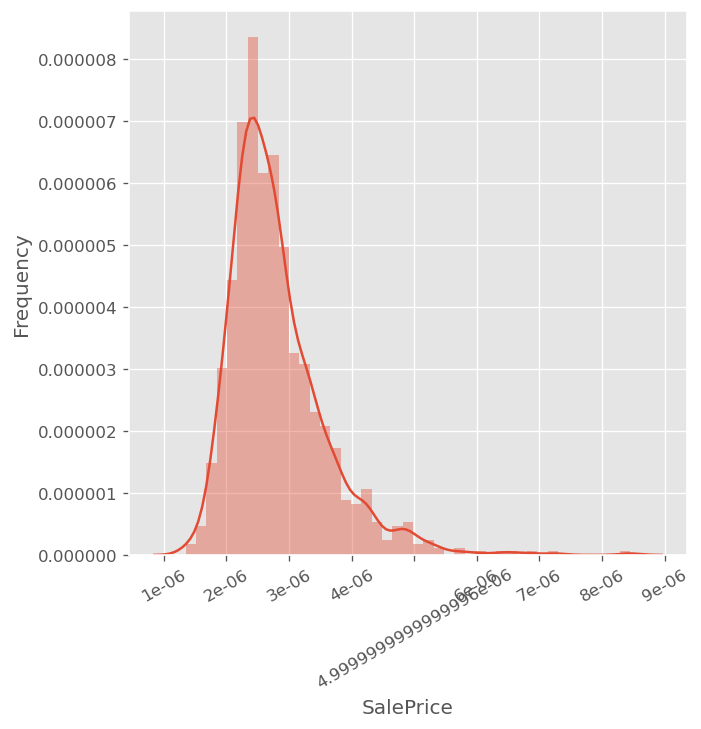

In [62]:
# Normality test
plt.figure(figsize = (6,6),dpi = 120)
b = sns.distplot(y_train)
b.set_xticklabels(b.get_yticks(), size = 10)
b.set_xticklabels(b.get_xticklabels(), rotation=30)
#b.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency')

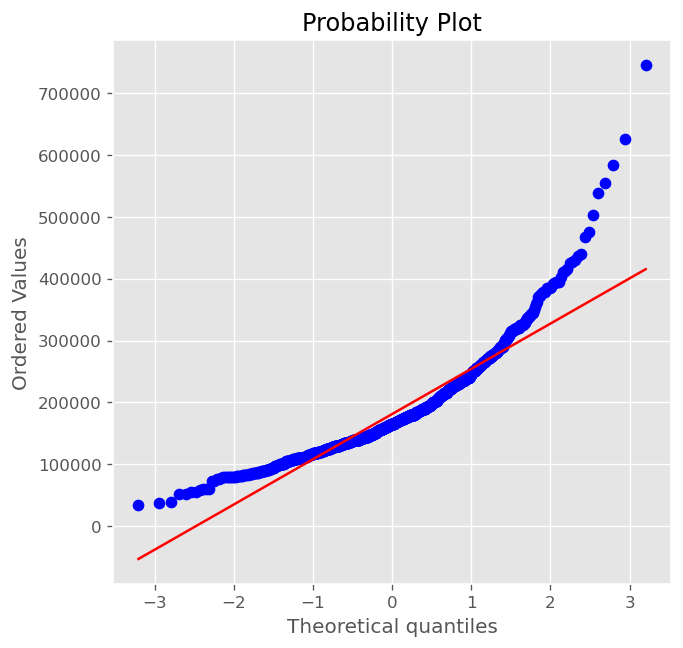

In [64]:
# Normality test
plt.figure(figsize = (6,6),dpi = 120)
import pylab 
import scipy.stats as stats
 
stats.probplot(y_train, dist="norm", plot=pylab)
pylab.show()

Text(0, 0.5, 'Frequency')

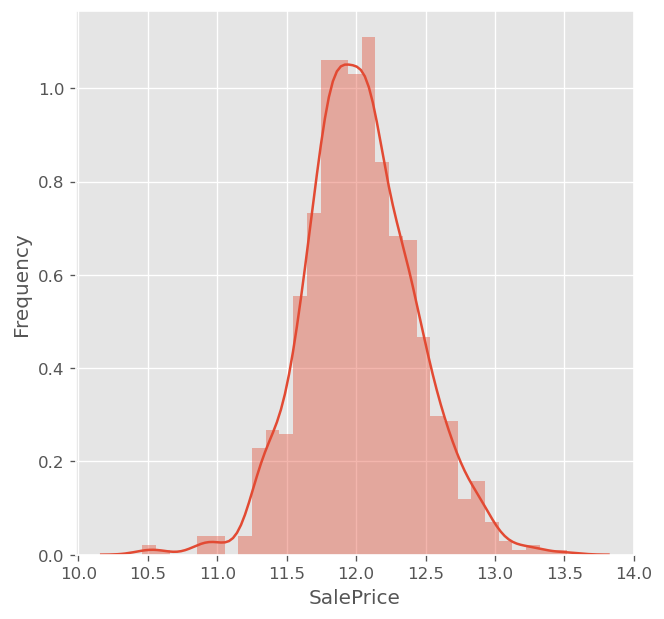

In [65]:
plt.figure(figsize = (6,6),dpi = 120)
sns.distplot(y_train.apply(lambda x: np.log(x)))
plt.ylabel('Frequency')

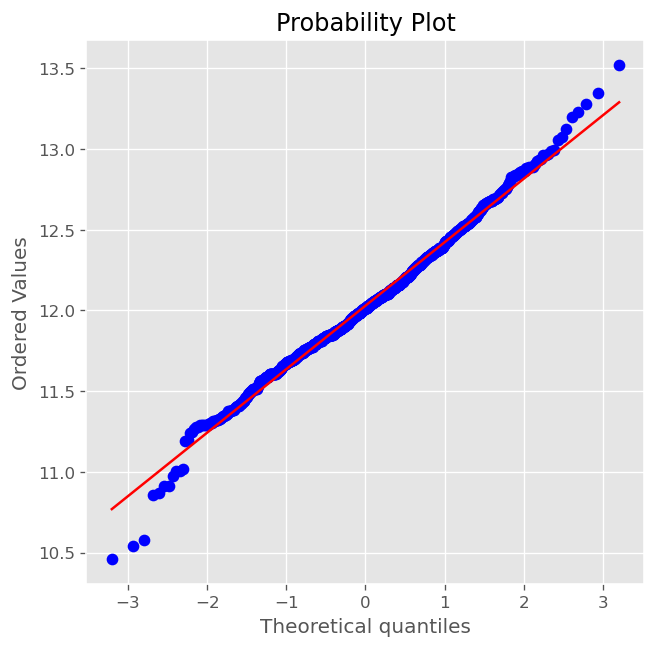

In [66]:
# transforming the SalePrice to log(SalePrice)
plt.figure(figsize = (6,6),dpi = 120)
import pylab 
import scipy.stats as stats
 
stats.probplot(y_train.apply(lambda x: np.log(x)), dist="norm", plot=pylab)
pylab.show()

In [67]:
# changing the 'SalePrice' to log(SalePrice)
y_train = y_train.apply(lambda x: np.log(x))

In [72]:
# dropping the two outliers
X_train.loc[X_train['GrLivArea']>4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,60,RL,60,40094,Pave,NA,IR1,Bnk,AllPub,Inside,...,0,0,NA,NA,NA,0,10,2007,New,Partial
1298,60,RL,60,63887,Pave,NA,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NA,NA,0,1,2008,New,Partial


In [74]:
X_train = X_train.drop([523,1298],0)

In [78]:
# making a list of all categorical features
categorical_mask = X_train.dtypes==object
categorical_columns = X_train.columns[categorical_mask].tolist()
categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [79]:
# dummifying categorical features
for colname in categorical_columns:
    colname1 = pd.get_dummies(X_train[colname], prefix=colname, prefix_sep='__')
    colname1 = colname1.drop(colname +'__'+str(X_train[colname].mode()[0]), axis=1)
#     colname1.head()
    X_train = pd.concat([X_train.drop(colname, axis=1), colname1], axis=1)
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
135,20,10400,7,6,1970,1970,288.0,0,0,1304,...,0,0,0,0,0,0,0,0,0,0
1452,180,3675,5,5,2005,2005,80.0,547,0,0,...,0,0,0,0,0,0,0,0,0,0
762,60,8640,7,5,2009,2009,0.0,24,0,732,...,0,0,0,0,0,0,0,0,0,0
932,20,11670,9,5,2006,2006,302.0,0,0,1905,...,0,0,0,0,0,0,0,0,0,0
435,60,10667,7,6,1996,1996,0.0,385,344,70,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,9317,6,5,2006,2006,0.0,24,0,1290,...,0,0,0,0,0,0,0,0,0,0
1130,50,7804,4,3,1928,1950,0.0,622,0,500,...,0,0,0,0,0,0,0,0,0,0
1294,20,8172,5,7,1955,1990,0.0,167,0,697,...,0,0,0,0,0,0,0,0,0,0
860,50,7642,7,8,1918,1998,0.0,0,0,912,...,0,0,0,0,0,0,0,0,0,0
